In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [5]:
#ver las primeras 5 filas del dataframe
df.head()

#obtener la informacion sobre el dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
#Verificar si hay valores nulos
print(df.isnull().sum())
#Eliminar filas con valores nulos
df = df.dropna().reset_index(drop=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
#Verificar si hay duplicados
print(df.duplicated().sum())

#Eliminar duplicados
df = df.drop_duplicates()

0


In [11]:
print(df)

     PassengerId  Survived  Pclass  \
0              2         1       1   
1              4         1       1   
2              7         0       1   
3             11         1       3   
4             12         1       1   
..           ...       ...     ...   
178          872         1       1   
179          873         0       1   
180          880         1       1   
181          888         1       1   
182          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
2                              McCarthy, Mr. Timothy J    male  54.0      0   
3                      Sandstrom, Miss. Marguerite Rut  female   4.0      1   
4                             Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [14]:
#Conversion de tipo de datos
df['Age'] = df['Age'].astype(int)

#Creacion de nuevas columnas
df['Tamaño Familia'] = df['SibSp'] + df['Parch']

#Ordenamiento de datos
df_sorted = df.sort_values(by='Age').reset_index(drop=True)
print(df_sorted)

     PassengerId  Survived  Pclass                                  Name  \
0            306         1       1        Allison, Master. Hudson Trevor   
1            184         1       2             Becker, Master. Richard F   
2            206         0       3            Strom, Miss. Telma Matilda   
3            298         0       1          Allison, Miss. Helen Loraine   
4            341         1       2        Navratil, Master. Edmond Roger   
..           ...       ...     ...                                   ...   
178           55         0       1        Ostby, Mr. Engelhart Cornelius   
179          457         0       1             Millet, Mr. Francis Davis   
180          746         0       1          Crosby, Capt. Edward Gifford   
181           97         0       1             Goldschmidt, Mr. George B   
182          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

        Sex  Age  SibSp  Parch     Ticket      Fare    Cabin Embarked  \
0      male   

In [15]:
#Aplicar funciones estadisticas
print(df['Age'].mean())
print(df['Fare'].max())

35.66120218579235
512.3292


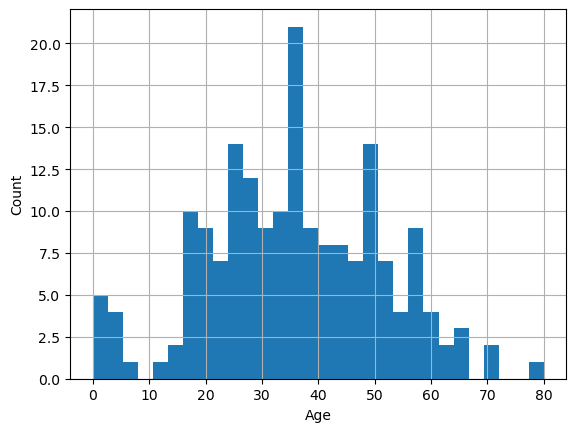

In [16]:
#Visualizacion de datos
import matplotlib.pyplot as plt

df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [18]:
#Creacion de resumen de datos
summary = df.describe()

#Exportacion de los resultados
summary.to_csv('summary.csv')

In [19]:
#Categorizacion de los datos
def categorize_age(age):
    if age < 18:
        return 'Niño'
    elif age < 60:
        return 'Adulto'
    else:
        return 'Anciano'
    
df['Categoria Edad'] = df['Age'].apply(categorize_age)
print(df)

     PassengerId  Survived  Pclass  \
0              2         1       1   
1              4         1       1   
2              7         0       1   
3             11         1       3   
4             12         1       1   
..           ...       ...     ...   
178          872         1       1   
179          873         0       1   
180          880         1       1   
181          888         1       1   
182          890         1       1   

                                                  Name     Sex  Age  SibSp  \
0    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
2                              McCarthy, Mr. Timothy J    male   54      0   
3                      Sandstrom, Miss. Marguerite Rut  female    4      1   
4                             Bonnell, Miss. Elizabeth  female   58      0   
..                                                 ...     ...  ...    ... 

In [21]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tamaño Familia,Categoria Edad
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,Adulto


In [22]:
survived_df = df[df['Survived'] == 1].reset_index(drop=True)
print(survived_df)
survived_df

     PassengerId  Survived  Pclass  \
0              2         1       1   
1              4         1       1   
2             11         1       3   
3             12         1       1   
4             22         1       2   
..           ...       ...     ...   
118          863         1       1   
119          872         1       1   
120          880         1       1   
121          888         1       1   
122          890         1       1   

                                                  Name     Sex  Age  SibSp  \
0    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
2                      Sandstrom, Miss. Marguerite Rut  female    4      1   
3                             Bonnell, Miss. Elizabeth  female   58      0   
4                                Beesley, Mr. Lawrence    male   34      0   
..                                                 ...     ...  ...    ... 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tamaño Familia,Categoria Edad
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,Adulto
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,Adulto
2,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,2,Niño
3,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,0,Adulto
4,22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13.0000,D56,S,0,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48,0,0,17466,25.9292,D17,S,0,Adulto
119,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S,2,Adulto
120,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,1,Adulto
121,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,0,Adulto


In [23]:
meanAgeByClass = df.groupby('Pclass')['Age'].mean()
print(meanAgeByClass)

Pclass
1    37.582278
2    25.200000
3    21.000000
Name: Age, dtype: float64


In [24]:
pivotTable = df.pivot_table(index='Sex', columns='Pclass', values='Fare', aggfunc='mean')
print(pivotTable)

Pclass           1          2       3
Sex                                  
female  103.128209  14.865744  13.360
male     75.957888  23.812500   8.695
